In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme()
sns.set_context("notebook")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
dtype_dict = {
    'Date': 'str',
    'FarmName_Pseudo': 'str',
    'SE_Number': 'str',
    'Age': 'Int64',
    'BreedName': 'str',
    'DailyYield': 'float',
    'PreviousDailyYield': 'float',
    'DailyYieldChange': 'float',
    'DaysInMilk': 'float',
    'YearSeason': 'str',
    'LactationNumber': 'float',
    'ExpectedYield': 'float',
    'NormalizedDailyYield': 'float',
    'NormalizedDailyYieldChange': 'float',
    'HeatStress': 'Int64',
    'Temp15Threshold': 'Int64',
    'HW': 'Int64',
    'cum_HW': 'Int64',
    'MeanTemperature': 'float',
    'MeanTHI_adj': 'float',
    'FarmHeatStressMilkProduction': 'float'
}

milk_data = pd.read_csv('../Data/MergedData/BLRMilkFarmYieldData.csv', dtype=dtype_dict)
milk_data['Date'] = pd.to_datetime(milk_data['Date'], format='%Y-%m-%d')
milk_data.head(-5)

Date FarmName_Pseudo           SE_Number   Age   BreedName  \
0      2022-01-01        a624fb9a    SE-064c0cec-1189  3095      02 SLB   
1      2022-01-02        a624fb9a    SE-064c0cec-1189  3096      02 SLB   
2      2022-01-03        a624fb9a    SE-064c0cec-1189  3097      02 SLB   
3      2022-01-04        a624fb9a    SE-064c0cec-1189  3098      02 SLB   
4      2022-01-05        a624fb9a    SE-064c0cec-1189  3099      02 SLB   
...           ...             ...                 ...   ...         ...   
483097 2023-06-03        f454e660  SE-fcdf259d-0044-0  4150  41 Fjällko   
483098 2023-06-04        f454e660  SE-fcdf259d-0044-0  4151  41 Fjällko   
483099 2023-06-05        f454e660  SE-fcdf259d-0044-0  4152  41 Fjällko   
483100 2023-06-06        f454e660  SE-fcdf259d-0044-0  4153  41 Fjällko   
483101 2023-06-07        f454e660  SE-fcdf259d-0044-0  4154  41 Fjällko   

        LactationNumber  DaysInMilk YearSeason  DailyYield  \
0                   7.0       191.0     2022-1       30.77   
1                   7.0       192.0     2022-1       48.22   
2                   7.0       193.0     2022-1       30.53   
3                   7.0       194.0     2022-1       42.26   
4                   7.0       195.0     2022-1       38.49   
...                 ...         ...        ...         ...   
483097             10.0       347.0     2023-3       12.67   
483098             10.0       348.0     2023-3       22.31   
483099             10.0       349.0     2023-3       12.84   
483100             10.0       350.0     2023-3        9.47   
483101             10.0       351.0     2023-3        8.97   

        PreviousDailyYield  ...  ExpectedYield  NormalizedDailyYield  \
0                 0.000000  ...      35.914865              0.856748   
1                30.770000  ...      35.799613              1.103224   
2                39.495000  ...      35.684360              1.023044   
3                36.506667  ...      35.569108              1.066796   
4                37.945000  ...      35.453856              1.073339   
...                    ...  ...            ...                   ...   
483097           14.652000  ...      13.608593              1.030966   
483098           14.030000  ...      13.516773              1.108549   
483099           14.984000  ...      13.424952              1.109278   
483100           14.892000  ...      13.333131              1.095617   
483101           14.608000  ...      13.241310              1.000807   

        NormalizedDailyYieldChange  HeatStress  Temp15Threshold  HW  cum_HW  \
0                         0.000000           0                0   0       0   
1                         0.243718           0                0   0       0   
2                        -0.083744           0                0   0       0   
3                         0.040438           0                0   0       0   
4                         0.003074           0                0   0       0   
...                            ...         ...              ...  ..     ...   
483097                   -0.045706           0                1   0       0   
483098                    0.070579           0                1   0       0   
483099                   -0.006853           0                1   0       0   
483100                   -0.021300           0                1   0       0   
483101                   -0.102407           0                1   0       0   

        MeanTemperature  MeanTHI_adj  FarmHeatStressMilkProduction  
0             -3.025000    28.012944                      0.009435  
1             -0.279167    32.898193                      0.009435  
2              2.033333    36.760487                      0.009435  
3              0.066667    31.939524                      0.009435  
4             -3.700000    26.498206                      0.009435  
...                 ...          ...                           ...  
483097        12.666667    53.132530                      0.001001  
4

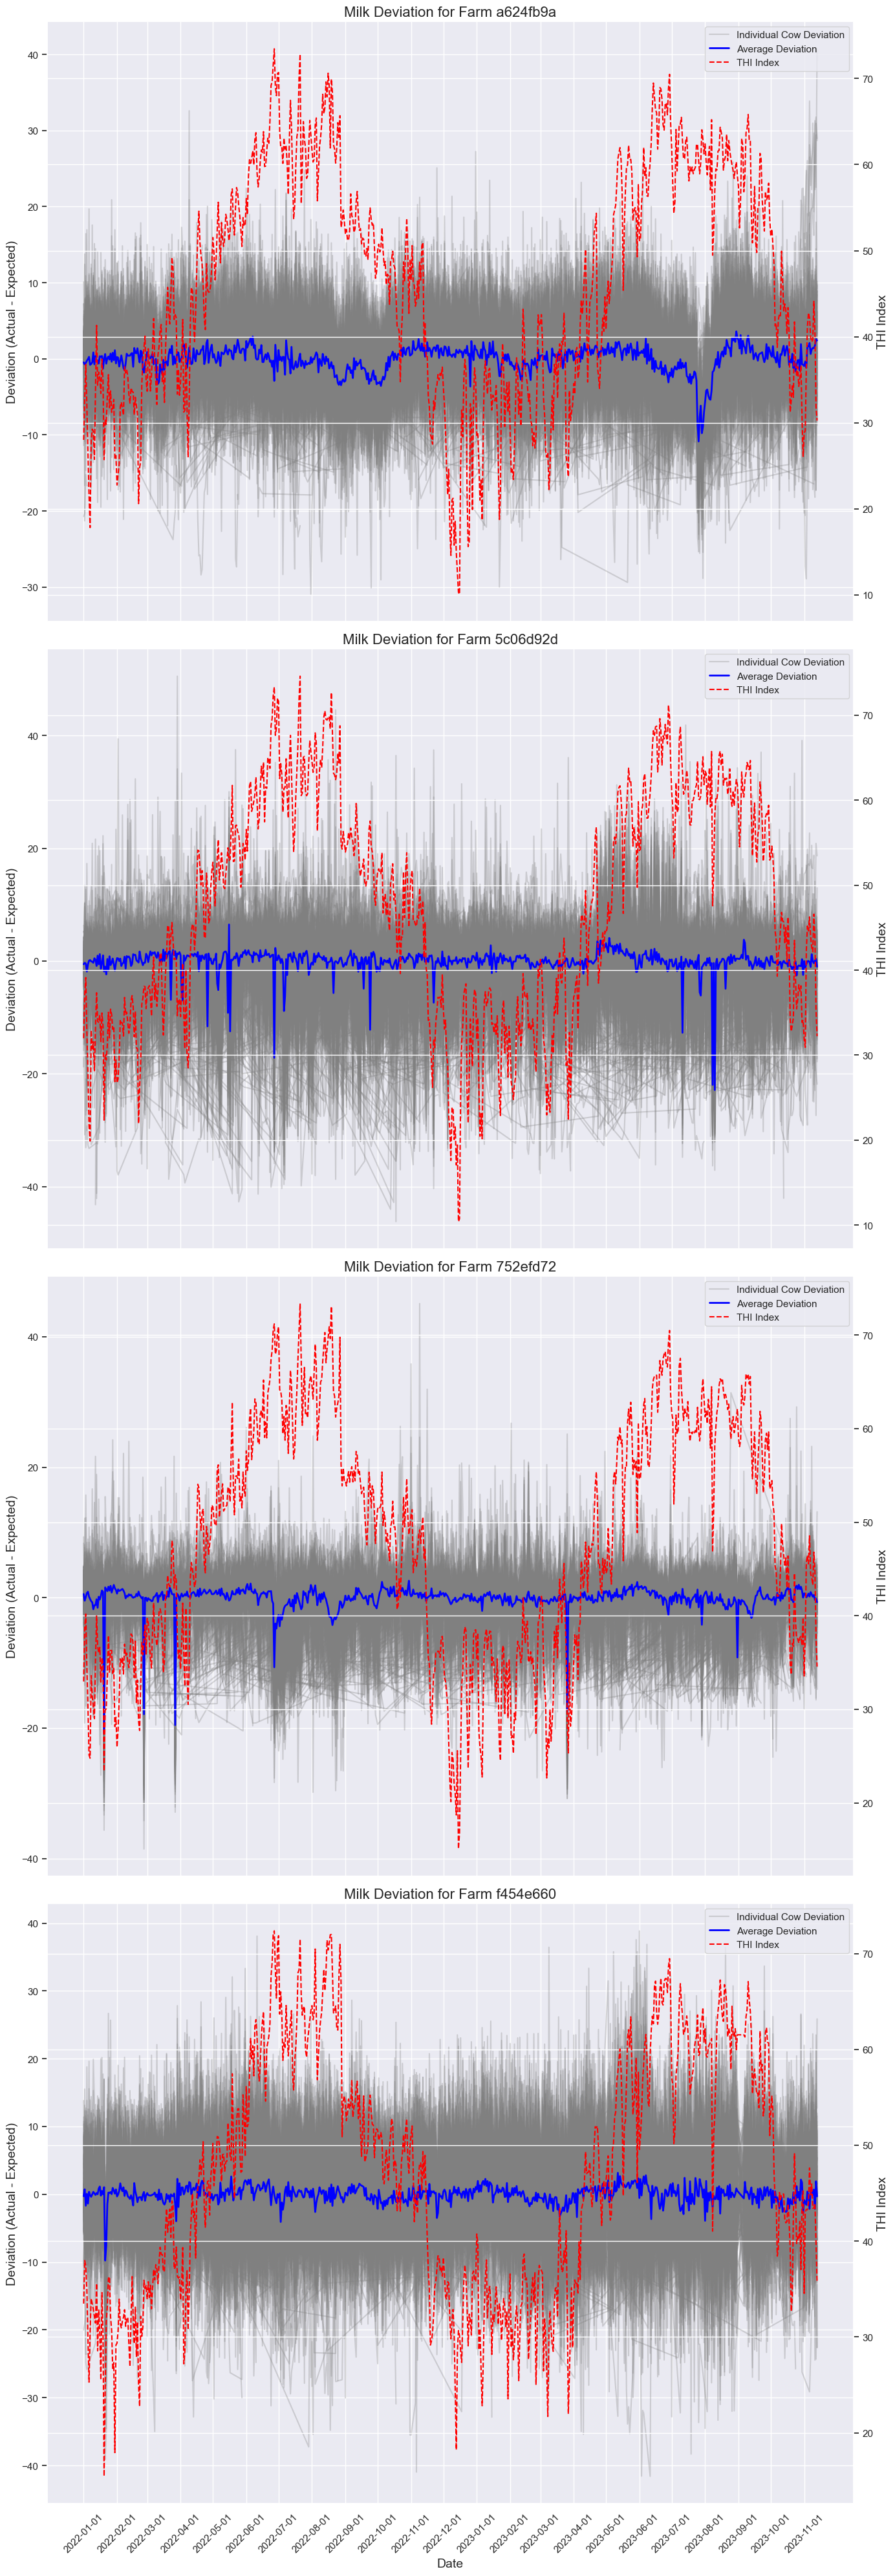

In [7]:
# List of farms
list_of_farms = milk_data['FarmName_Pseudo'].unique()

# Create a subplot for each farm
fig, axs = plt.subplots(len(list_of_farms), 1, figsize=(14, len(list_of_farms) * 10), sharex=True)

# Loop through each farm and plot in its subplot
for i, farm in enumerate(list_of_farms):
    ax = axs[i]
    
    # Select data for the current farm and create a copy
    selected_farm = milk_data[milk_data['FarmName_Pseudo'] == farm].copy()
    
    # Calculate the deviation: ActualYield - ExpectedYield
    selected_farm['Deviation'] = selected_farm['DailyYield'] - selected_farm['ExpectedYield']
    
    # Plot individual cow deviations in a muted gray color
    for cow in selected_farm['SE_Number'].unique():
        cow_data = selected_farm[selected_farm['SE_Number'] == cow]
        ax.plot(cow_data['Date'], cow_data['Deviation'], color='gray', alpha=0.3, label='Individual Cow Deviation' if cow == selected_farm['SE_Number'].unique()[0] else "")
    
    # Plot the average deviation in a bright color (blue)
    avg_deviation = selected_farm.groupby('Date')['Deviation'].mean()
    ax.plot(avg_deviation.index, avg_deviation.values, color='blue', linewidth=2, label='Average Deviation')
    
    # Calculate the mean THI for each date (just one line)
    mean_thi = selected_farm.groupby('Date')['MeanTHI_adj'].mean()
    
    # Add secondary Y-axis for THI with a single clean line (red)
    ax2 = ax.twinx()
    ax2.plot(mean_thi.index, mean_thi.values, color='red', linestyle='--', label='THI Index')
    ax2.set_ylabel('THI Index', fontsize=14)
    
    # Set titles and labels
    ax.set_title(f'Milk Deviation for Farm {farm}', fontsize=16)
    ax.set_ylabel('Deviation (Actual - Expected)', fontsize=14)
    ax.grid(True)
    
    # Ensure X-axis ticks are shown for each subplot
    ax.set_xticks(pd.date_range(start=selected_farm['Date'].min(), end=selected_farm['Date'].max(), freq='MS'))
    ax.tick_params(axis='x', rotation=45)

    # Combine legends from both axes
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Label for the X-axis
axs[-1].set_xlabel('Date', fontsize=14)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

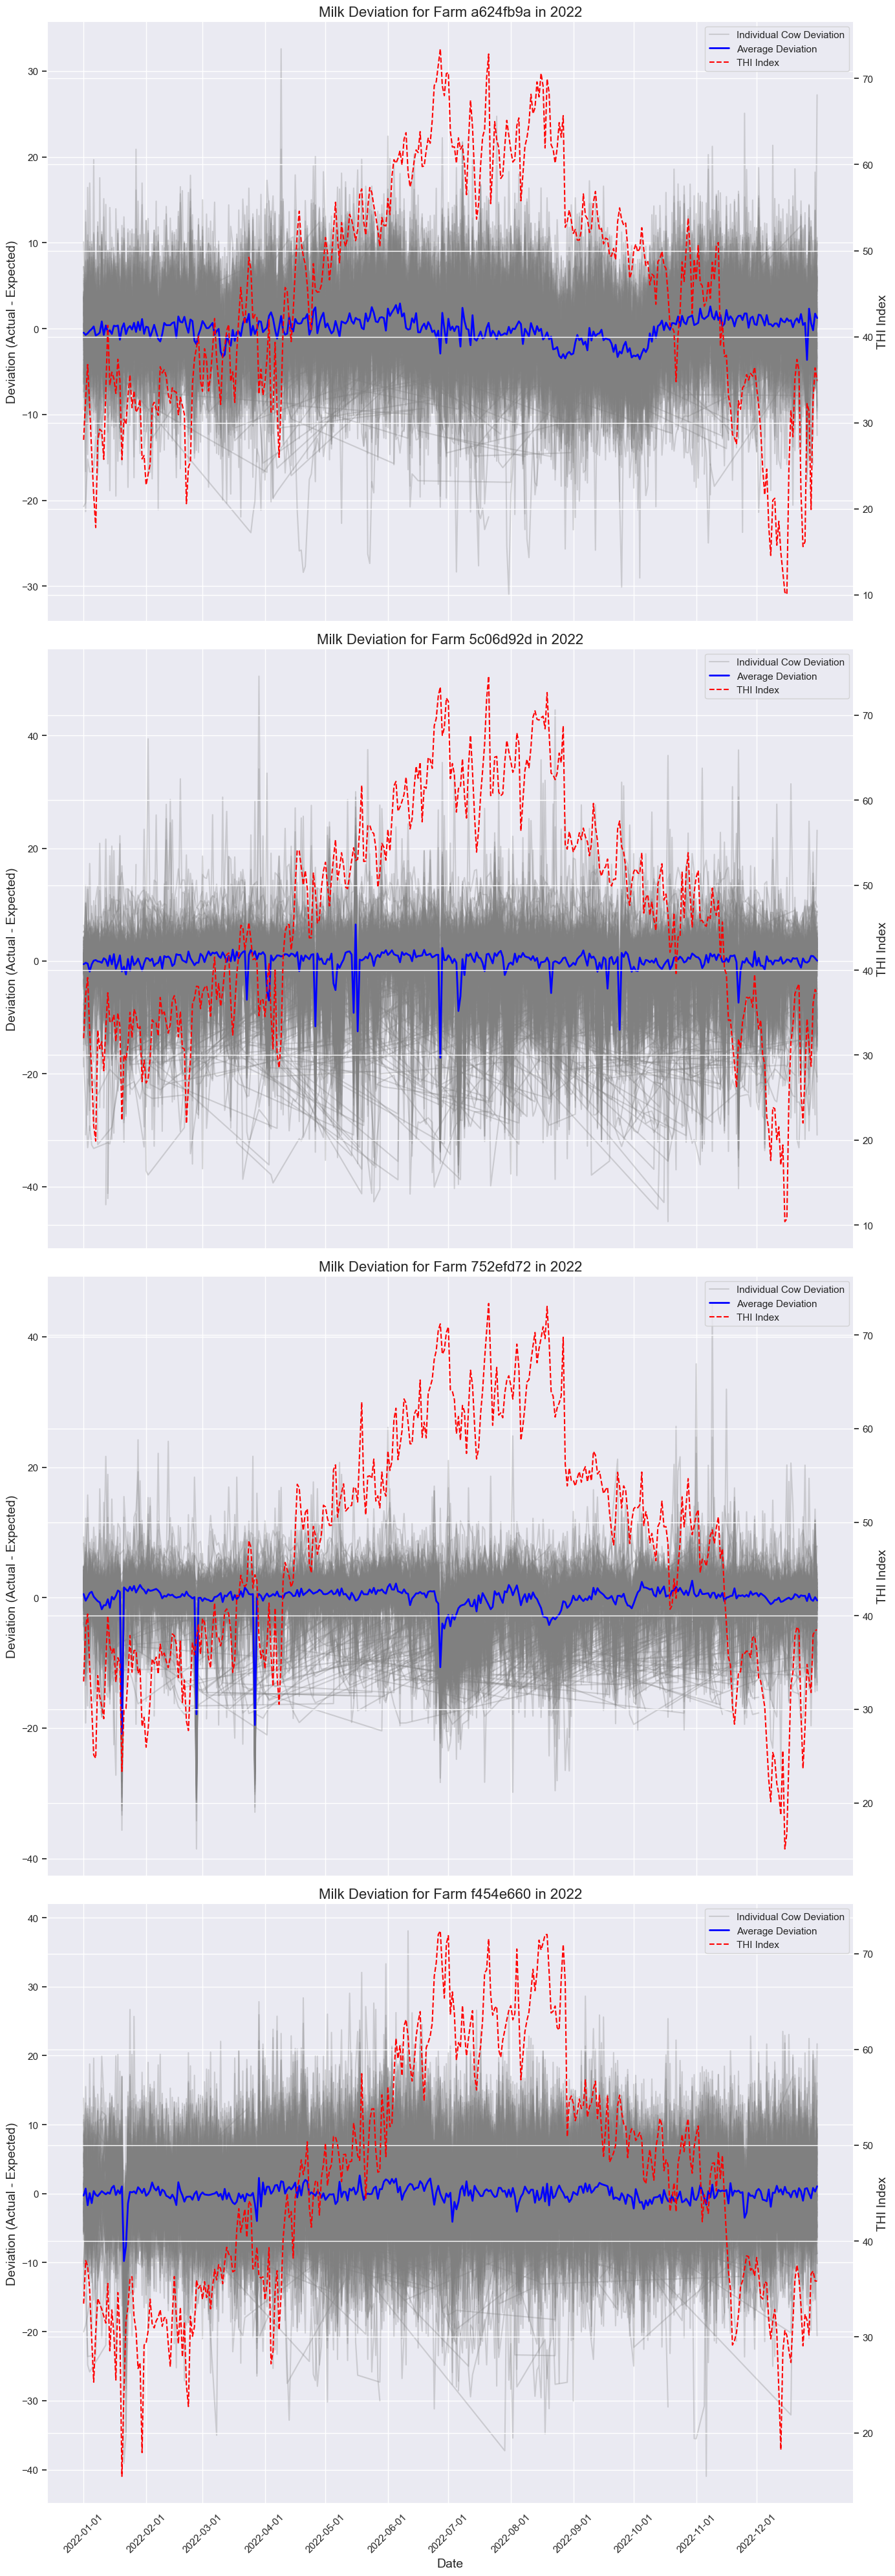

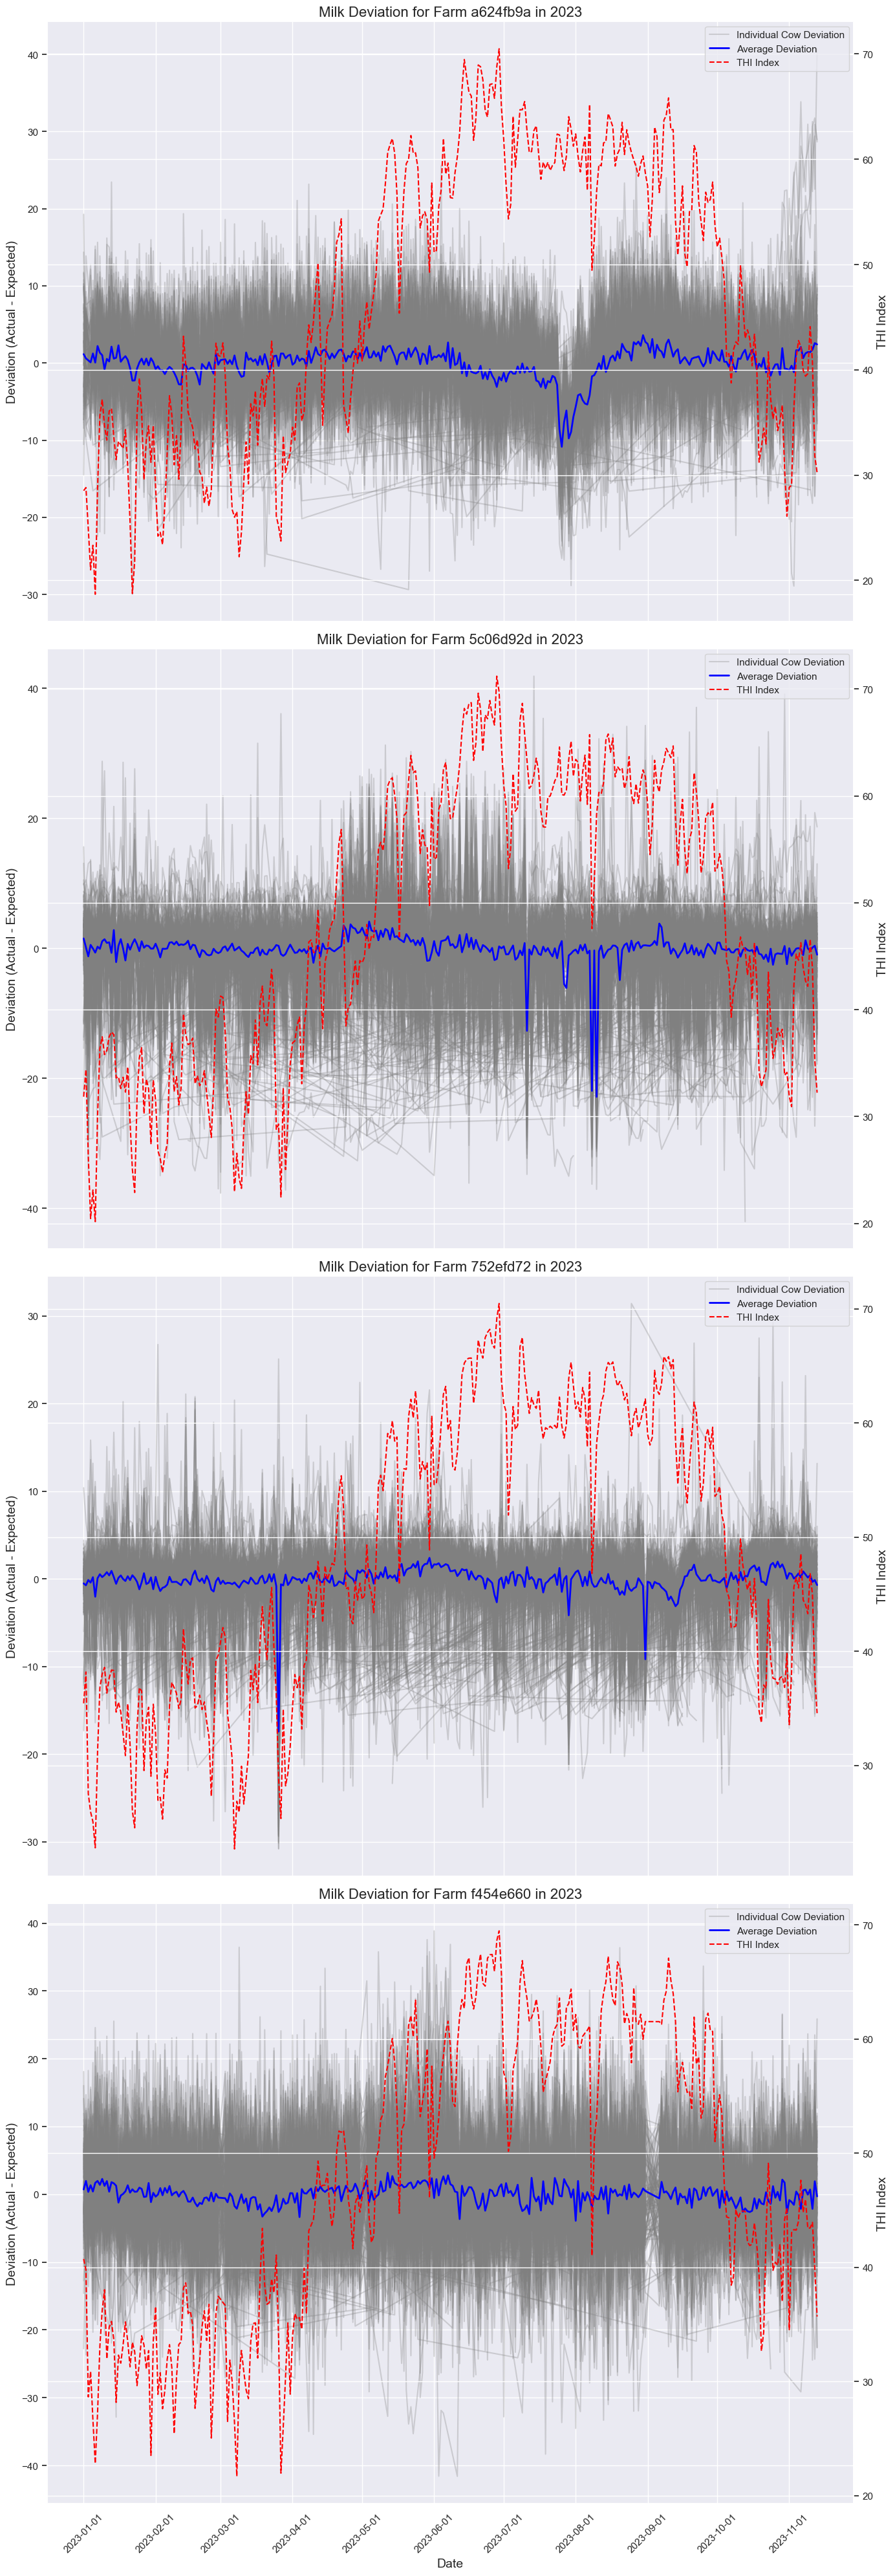

In [9]:
# List of farms
list_of_farms = milk_data['FarmName_Pseudo'].unique()

# Create a figure for 2022 with 4 subplots
fig, axs = plt.subplots(len(list_of_farms), 1, figsize=(14, len(list_of_farms) * 10), sharex=True)

# Loop through each farm for 2022
for i, farm in enumerate(list_of_farms):
    ax = axs[i]
    
    # Select data for the current farm and 2022
    selected_farm = milk_data[(milk_data['FarmName_Pseudo'] == farm) & (milk_data['Date'].dt.year == 2022)].copy()
    
    # Calculate the deviation: ActualYield - ExpectedYield
    selected_farm['Deviation'] = selected_farm['DailyYield'] - selected_farm['ExpectedYield']
    
    # Plot individual cow deviations in a muted gray color
    for cow in selected_farm['SE_Number'].unique():
        cow_data = selected_farm[selected_farm['SE_Number'] == cow]
        ax.plot(cow_data['Date'], cow_data['Deviation'], color='gray', alpha=0.3, label='Individual Cow Deviation' if cow == selected_farm['SE_Number'].unique()[0] else "")
    
    # Plot the average deviation in a bright color (blue)
    avg_deviation = selected_farm.groupby('Date')['Deviation'].mean()
    ax.plot(avg_deviation.index, avg_deviation.values, color='blue', linewidth=2, label='Average Deviation')
    
    # Calculate the mean THI for each date (just one line)
    mean_thi = selected_farm.groupby('Date')['MeanTHI_adj'].mean()
    
    # Add secondary Y-axis for THI with a single clean line (red)
    ax2 = ax.twinx()
    ax2.plot(mean_thi.index, mean_thi.values, color='red', linestyle='--', label='THI Index')
    ax2.set_ylabel('THI Index', fontsize=14)
    
    # Set titles and labels
    ax.set_title(f'Milk Deviation for Farm {farm} in 2022', fontsize=16)
    ax.set_ylabel('Deviation (Actual - Expected)', fontsize=14)
    ax.grid(True)
    
    # Ensure X-axis ticks are shown for each subplot
    ax.set_xticks(pd.date_range(start=selected_farm['Date'].min(), end=selected_farm['Date'].max(), freq='MS'))
    ax.tick_params(axis='x', rotation=45)

    # Combine legends from both axes
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Label for the X-axis
axs[-1].set_xlabel('Date', fontsize=14)

# Tight layout for better spacing
plt.tight_layout()

# Show the 2022 plot
plt.show()

# Create a figure for 2023 with 4 subplots
fig, axs = plt.subplots(len(list_of_farms), 1, figsize=(14, len(list_of_farms) * 10), sharex=True)

# Loop through each farm for 2023
for i, farm in enumerate(list_of_farms):
    ax = axs[i]
    
    # Select data for the current farm and 2023
    selected_farm = milk_data[(milk_data['FarmName_Pseudo'] == farm) & (milk_data['Date'].dt.year == 2023)].copy()
    
    # Calculate the deviation: ActualYield - ExpectedYield
    selected_farm['Deviation'] = selected_farm['DailyYield'] - selected_farm['ExpectedYield']
    
    # Plot individual cow deviations in a muted gray color
    for cow in selected_farm['SE_Number'].unique():
        cow_data = selected_farm[selected_farm['SE_Number'] == cow]
        ax.plot(cow_data['Date'], cow_data['Deviation'], color='gray', alpha=0.3, label='Individual Cow Deviation' if cow == selected_farm['SE_Number'].unique()[0] else "")
    
    # Plot the average deviation in a bright color (blue)
    avg_deviation = selected_farm.groupby('Date')['Deviation'].mean()
    ax.plot(avg_deviation.index, avg_deviation.values, color='blue', linewidth=2, label='Average Deviation')
    
    # Calculate the mean THI for each date (just one line)
    mean_thi = selected_farm.groupby('Date')['MeanTHI_adj'].mean()
    
    # Add secondary Y-axis for THI with a single clean line (red)
    ax2 = ax.twinx()
    ax2.plot(mean_thi.index, mean_thi.values, color='red', linestyle='--', label='THI Index')
    ax2.set_ylabel('THI Index', fontsize=14)
    
    # Set titles and labels
    ax.set_title(f'Milk Deviation for Farm {farm} in 2023', fontsize=16)
    ax.set_ylabel('Deviation (Actual - Expected)', fontsize=14)
    ax.grid(True)
    
    # Ensure X-axis ticks are shown for each subplot
    ax.set_xticks(pd.date_range(start=selected_farm['Date'].min(), end=selected_farm['Date'].max(), freq='MS'))
    ax.tick_params(axis='x', rotation=45)

    # Combine legends from both axes
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Label for the X-axis
axs[-1].set_xlabel('Date', fontsize=14)

# Tight layout for better spacing
plt.tight_layout()

# Show the 2023 plot
plt.show()